# Mémoire projet python
## Alexis Aubert, Alan Loret, Alexandre Taranoff, Axel Chedri

Notre projet informatique explore quelques stratégies possibles pour acheter et vendre des actions. Nous commençons par une petite analyse des données. 

Nous considérons quelques hypothèses simplificatrices ainsi aucun frais n'est appliqué à l'achat ou à la vente. Pour chaque jour la stratégie décide d'acheter ou non, si achat il y a le prix considéré est celui à l'ouverture. Nous implémentons plusieurs méthodes pour décider d'acheter ou vendre et nous calculons ensuite quelques résultats. Enfin nous comparons ces différentes stratégies à la stratégie dite "Buy and Hold", qui consiste simplement à acheter un titre et le garder.

Nous implémentons une première stratégie avec des moyennes mobiles, qui achète si la tendance est haussière (moyenne sur le court terme au dessus de la moyenne long terme) et vend si la tendance est baissière. Nous implémentons ensuite la stratégie Buy and Hold pour servir de comparaison. En comparant les moyennes mobiles et Buy and Hold on observe la stratégie moyennes mobiles. Nous étuidons par la suite de la même façon le modèle de la régression linéaire et du radom forest.

La deuxième partie de notre mémoire se consacre à la prédiction des cours. Pour cela nous implémentons différents algorithmes dont la régression linéaire, random forest, xgboost, lgbm, knn et un réseau de neurones. Les algorithmes sont comparés en terme de résultats sur les prédictions (RMSE), sur les opportunités saisies et ratées.

Cette manière de procéder semble donner un petit avantage (un peu moins de 10 % en plus que le hasard ou le jour précédent). Pour quelques algorithmes nous simulons une stratégie qui se base sur ces prédictions : si les prédictions sont à la hausse nous achetons ou on conservons sinon nous vendons ou nous attendons. Les résultats semblent encourageant surtout en comparaison à la stratégie Buy and Hold.

Il convient de nuancer ces résultats puisque d'une part nous appliquons aucun frais et qu'ensuite sur les années testées le marché s'éffondre suite au coronavirus et donc que ne rien faire permet de surpasser le marché.

In [1]:
#Librairies
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/Users/alanloret/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Collecting Data

In [2]:
startdate = datetime.datetime(2000, 10, 1)
enddate = datetime.datetime(2020, 5, 7)
predictdate = datetime.datetime(2018,11,22)
#predictdate = datetime.datetime(2019,11,22)

#SIGN = ['AAPL','GOOGL','MSFT','AMZN']
#SIGN = ['AC','AI','AIR']
SIGN = ['AIR','AC','LUV','DAL','AAL']
#Air transport industry
NAMES = ['Air bus', 'Air Canada','Southwest','Delta Air lines','American Air lines']
# Boeing excluded stock too high 'BA' 'Boeing'
#SIGN = ['AIR']
TRAINSIGN = 'AIR'

ticker = pdr.get_data_yahoo(SIGN, start=startdate, end=enddate)

Attributes  Adj Close                                              Close  \
Symbols           AIR         AC        LUV        DAL    AAL        AIR   
Date                                                                       
2020-05-01  18.330000  35.980000  29.230000  24.120001  10.64  18.330000   
2020-05-04  17.969999  36.279999  27.559999  22.570000   9.82  17.969999   
2020-05-05  17.590000  36.200001  26.420000  21.709999   9.51  17.590000   
2020-05-06  16.340000  34.590000  24.930000  21.000000   9.25  16.340000   
2020-05-07  16.690001  36.720001  25.450001  21.680000   9.54  16.690001   

Attributes                                          ...       Open             \
Symbols            AC        LUV        DAL    AAL  ...        AIR         AC   
Date                                                ...                         
2020-05-01  35.980000  29.230000  24.120001  10.64  ...  19.020000  36.689999   
2020-05-04  36.279999  27.559999  22.570000   9.82  ...  17.510000  35.735001   
2020-05-05  36.200001  26.420000  21.709999   9.51  ...  18.490000  37.250000   
2020-05-06  34.590000  24.930000  21.000000   9.25  ...  17.620001  36.910000   
2020-05-07  36.720001  25.450001  21.680000   9.54  ...  16.620001  35.000000   

Attributes                                 Volume                       \
Symbols           LUV        DAL    AAL       AIR       AC         LUV   
Date                                                                     
2020-05-01  30.500000  24.950001  11.41  364500.0  14300.0  36353800.0   
2020-05-04  27.230000  21.190001   9.41  447100.0  10200.0  43447700.0   
2020-05-05  28.070000  23.020000  10.26  304200.0  11500.0  36676900.0   
2020-05-06  26.549999  21.760000   9.58  244200.0  22100.0  36971800.0   
2020-05-07  24.990000  21.070000   9.30  378700.0  15000.0  24535900.0   

Attributes                           
Symbols            DAL          AAL  
Date                                 
2020-05-01  45146100.0   99441400.0  
2020-05-04  91387100.0  125580000.0  
2020-05-05  51178700.0   86943900.0  
2020-05-06  52949200.0   68991000.0  
2020-05-07  48328200.0   61817000.0  

[5 rows x 30 columns]

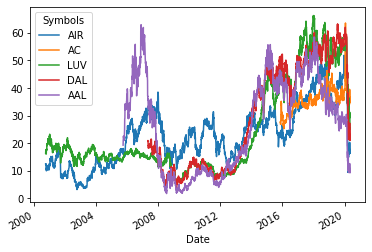

In [3]:
ticker['Close'].plot()
ticker.tail()

# Basic analysis

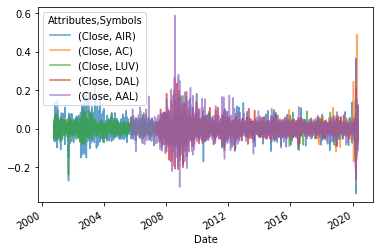

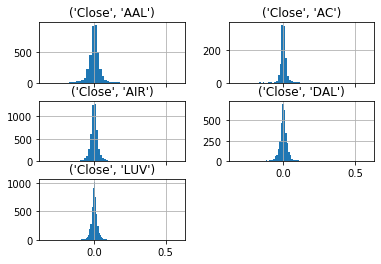

In [4]:
#Returns
daily_close_px = ticker[['Close']]
daily_pct_change = daily_close_px.pct_change()
plt.show()


# Show retrun and distribution
daily_pct_change.plot(alpha=0.7)
daily_pct_change.hist(bins=50, sharex=True)
plt.show()

In [5]:
#Trend
daily_pct_change.mean()

Attributes  Symbols
Close       AIR        0.000559
            AC         0.000630
            LUV        0.000335
            DAL        0.000593
            AAL        0.000715
dtype: float64

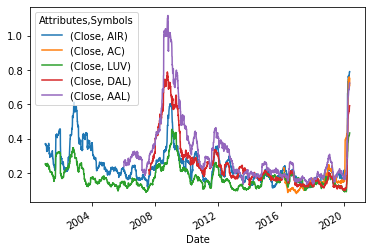

In [6]:
#Volatility
min_periods = 75

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot()

Les returns semblent former un gaussienne avec un moyenne légérement positive (donc tendance haussière).

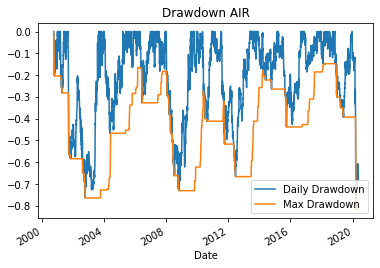

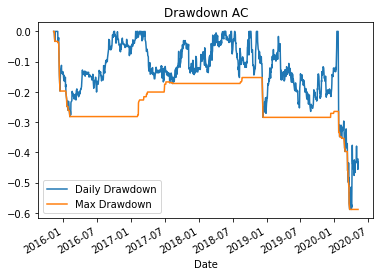

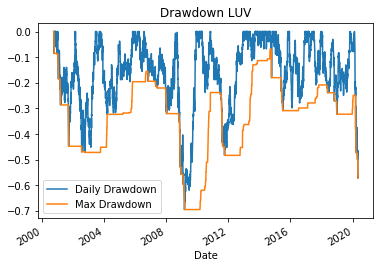

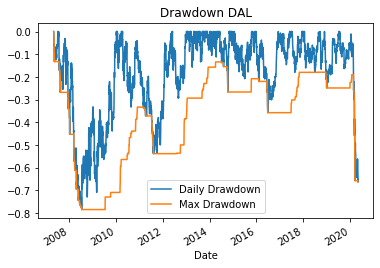

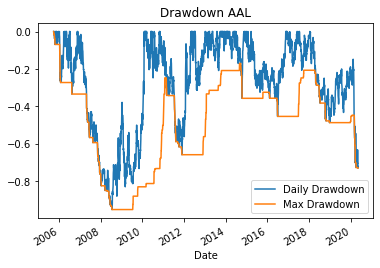

In [7]:
# Define a trailing 252 trading day window
window = 252

for sign in SIGN:
    plt.figure()
    # Calculate the max drawdown in the past window days for each day 
    rolling_max = ticker['Adj Close',sign].rolling(window, min_periods=1).max()
    daily_drawdown = ticker['Adj Close',sign]/rolling_max - 1.0

    # Calculate the minimum (negative) daily drawdown
    max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

    # Plot the results
    daily_drawdown.plot(label='Daily Drawdown')
    max_daily_drawdown.plot(label='Max Drawdown')
    
    plt.title("Drawdown "+sign)
    plt.legend()
    
    # Show the plot
    plt.show()

# Moving average strategy

In [8]:
#Select the data to predict:
ticker = pdr.get_data_yahoo(SIGN, start=predictdate, end=enddate)

# Creat signals
short_window = 5
long_window = 60

#Create Data Frame
multiindex = [(a,b) for a in ['signal','short_mavg','long_mavg','positions'] for b in SIGN]
signals_ma = pd.DataFrame(index=ticker.index,columns=pd.MultiIndex.from_tuples(multiindex,names=['Attributes', 'Symbols']))

signals_ma['signal'] = 0.0

# Create short simple moving average over the short window
signals_ma['short_mavg'] = ticker['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals_ma['long_mavg'] = ticker['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals_ma.loc[short_window:,'signal'] = np.where(signals_ma['short_mavg'][short_window:] 
                                            > signals_ma['long_mavg'][short_window:], 1.0, 0.0)   

signals_ma['positions'] = signals_ma['signal'].diff()

# Print `signals`
signals_ma.tail()

Attributes signal                     short_mavg                          \
Symbols       AIR   AC  LUV  DAL  AAL        AIR      AC     LUV     DAL   
Date                                                                       
2020-05-01    0.0  1.0  0.0  0.0  0.0     18.764  37.710  30.050  24.770   
2020-05-04    0.0  1.0  0.0  0.0  0.0     18.992  37.716  29.740  24.852   
2020-05-05    0.0  1.0  0.0  0.0  0.0     18.754  37.242  29.086  24.326   
2020-05-06    0.0  1.0  0.0  0.0  0.0     17.962  36.264  27.878  23.062   
2020-05-07    0.0  0.0  0.0  0.0  0.0     17.384  35.954  26.718  22.216   

Attributes          long_mavg                                              \
Symbols        AAL        AIR         AC        LUV        DAL        AAL   
Date                                                                        
2020-05-01  11.312  26.188833  36.560167  40.726000  36.331167  16.517000   
2020-05-04  11.272  25.749667  36.436167  40.223333  35.737667  16.209000   
2020-05-05  10.922  25.303167  36.351333  39.709333  35.134167  15.894500   
2020-05-06  10.246  24.842167  36.242500  39.167833  34.522333  15.568833   
2020-05-07   9.752  24.380833  36.145333  38.626500  33.906000  15.230500   

Attributes positions                      
Symbols          AIR   AC  LUV  DAL  AAL  
Date                                      
2020-05-01       0.0  0.0  0.0  0.0  0.0  
2020-05-04       0.0  0.0  0.0  0.0  0.0  
2020-05-05       0.0  0.0  0.0  0.0  0.0  
2020-05-06       0.0  0.0  0.0  0.0  0.0  
2020-05-07       0.0 -1.0  0.0  0.0  0.0

### Show the moving averages

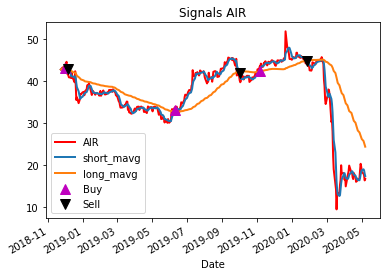

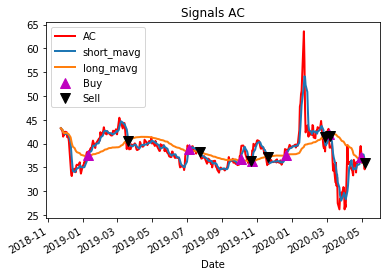

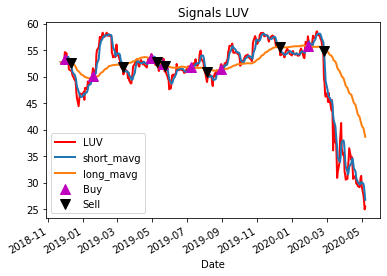

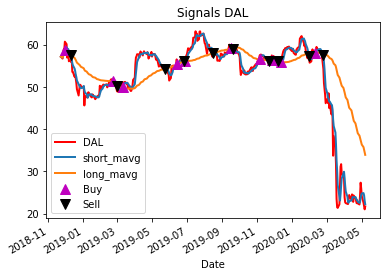

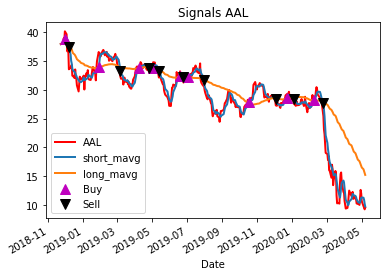

In [9]:
# On all the data available
for sign in SIGN:
    plt.figure()
    # Plot the closing price
    ticker['Close'][sign].plot(color='r', lw=2.,label=sign)

    # Plot the short and long moving averages
    signals_ma['short_mavg'][sign].plot(lw=2.,label='short_mavg')
    signals_ma['long_mavg'][sign].plot(lw=2.,label='long_mavg')
    
    #Plot the buy signals
    plt.plot(signals_ma.loc[signals_ma.positions[sign] == 1.0].index, 
         signals_ma.short_mavg[sign][signals_ma.positions[sign] == 1.0],
         '^', markersize=10, color='m',label="Buy")
    
    #plot the sell signals
    plt.plot(signals_ma.loc[signals_ma.positions[sign] == -1.0].index, 
         signals_ma.short_mavg[sign][signals_ma.positions[sign] == -1.0],
         'v', markersize=10, color='k',label="Sell")
    
    plt.legend()
    plt.title("Signals "+sign)

# Backtest Moving averages strategy

### Simulate the strategy

In [10]:
def backtest(ticker,signals,intial_capital=100000):
    # Create a DataFrame `positions`
    multiindex = [(a,b) for a in ['action','holdings','cash','total','returns'] for b in SIGN]
    #positions = pd.DataFrame(index=signals.index).fillna(0.0)
    portfolio = pd.DataFrame(index=signals.index,columns=pd.MultiIndex.from_tuples(multiindex,names=['Attributes', 'Symbols']))

    for sign in SIGN:
        # Set the initial capital
        initial_capital= float(100000.0)

        positions = pd.DataFrame(index=signals.index,columns=['action']).fillna(0.0)

        # Buy a 100 shares
        positions['action'] = 1000*signals['signal',sign]  

        # Initialize the portfolio with value owned   
        portfolio['action',sign] = positions['action'].multiply(ticker['Adj Close'][sign], axis=0)

        # Store the difference in shares owned 
        pos_diff = positions.diff()

        # Add `holdings` to portfolio
        portfolio['holdings',sign] = (positions['action'].multiply(ticker['Adj Close',sign], axis=0))#.sum(axis=1)

        # Add `cash` to portfolio
        portfolio['cash',sign] = initial_capital - (pos_diff.multiply(ticker['Adj Close',sign], axis=0)).sum(axis=1).cumsum()   

        # Add `total` to portfolio
        portfolio['total',sign] = portfolio['cash',sign] + portfolio['holdings',sign]

        # Add `returns` to portfolio
        portfolio['returns',sign] = portfolio['total',sign].pct_change()
        
    return portfolio

portfolio_ma = backtest(ticker,signals_ma)
        
# Print the first lines of `portfolio`
portfolio_ma.tail()

Attributes action                              holdings                     \
Symbols       AIR            AC  LUV  DAL  AAL      AIR            AC  LUV   
Date                                                                         
2020-05-01    0.0  35979.999542  0.0  0.0  0.0      0.0  35979.999542  0.0   
2020-05-04    0.0  36279.998779  0.0  0.0  0.0      0.0  36279.998779  0.0   
2020-05-05    0.0  36200.000763  0.0  0.0  0.0      0.0  36200.000763  0.0   
2020-05-06    0.0  34590.000153  0.0  0.0  0.0      0.0  34590.000153  0.0   
2020-05-07    0.0      0.000000  0.0  0.0  0.0      0.0      0.000000  0.0   

Attributes            ...          total                              \
Symbols     DAL  AAL  ...            AIR            AC           LUV   
Date                  ...                                              
2020-05-01  0.0  0.0  ...  105162.269592  93811.923981  83841.480255   
2020-05-04  0.0  0.0  ...  105162.269592  94111.923218  83841.480255   
2020-05-05  0.0  0.0  ...  105162.269592  94031.925201  83841.480255   
2020-05-06  0.0  0.0  ...  105162.269592  92421.924591  83841.480255   
2020-05-07  0.0  0.0  ...  105162.269592  94551.925659  83841.480255   

Attributes                             returns                           
Symbols              DAL           AAL     AIR        AC  LUV  DAL  AAL  
Date                                                                     
2020-05-01  92778.568268  80643.579483     0.0 -0.023829  0.0  0.0  0.0  
2020-05-04  92778.568268  80643.579483     0.0  0.003198  0.0  0.0  0.0  
2020-05-05  92778.568268  80643.579483     0.0 -0.000850  0.0  0.0  0.0  
2020-05-06  92778.568268  80643.579483     0.0 -0.017122  0.0  0.0  0.0  
2020-05-07  92778.568268  80643.579483     0.0  0.023046  0.0  0.0  0.0  

[5 rows x 25 columns]

### Show the portfolio

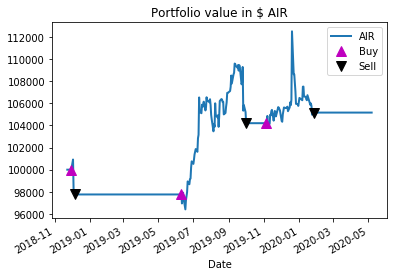

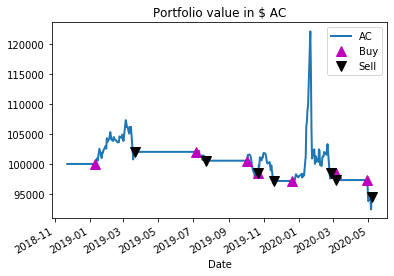

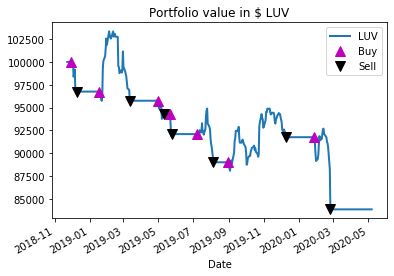

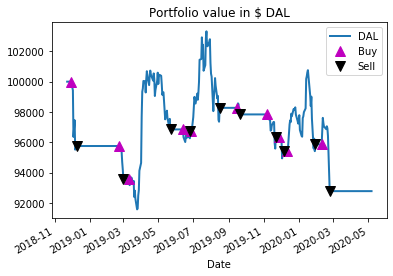

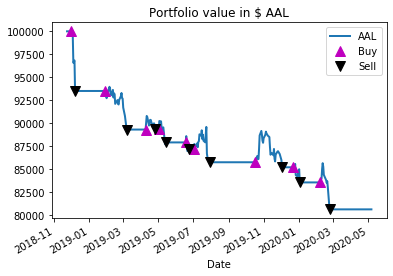

In [11]:
def show_portfolio(portfolio,signals,date=startdate):
    for sign in SIGN:
        plt.figure()

        # Plot the equity curve in dollars
        portfolio['total'][sign][ticker.index >= date].plot(lw=2.)


        #Plot the buy signals
        plt.plot(portfolio.loc[signals.positions[sign] == 1.0].index, 
             portfolio['total'][sign][signals.positions[sign] == 1.0],
             '^', markersize=10, color='m',label="Buy")

        #plot the sell signals
        plt.plot(portfolio.loc[signals.positions[sign] == -1.0].index, 
             portfolio['total',sign][signals.positions[sign] == -1.0],
             'v', markersize=10, color='k',label="Sell")

        plt.legend()
        plt.title("Portfolio value in $ "+sign)
        
show_portfolio(portfolio_ma,signals_ma)

### Numbers on the moving average strategy

In [12]:
# Show numbers on the strategy
initial_capital = 100000

#Total return
print("Returns : \n",(portfolio_ma['total'].tail(1)-initial_capital)/initial_capital)

# Isolate the returns of your strategy
returns_ma = portfolio_ma['returns']

#Volatility
print("\n Volatility : \n",returns_ma.std())

# annualized Sharpe ratio
sharpe_ratio_ma = np.sqrt(252) * (returns_ma.mean() / returns_ma.std())

# Print the Sharpe ratio
print("\nSharpe ratio:\n",sharpe_ratio_ma)

Returns : 
 Symbols          AIR        AC       LUV       DAL       AAL
Date                                                        
2020-05-07  0.051623 -0.054481 -0.161585 -0.072214 -0.193564

 Volatility : 
 Symbols
AIR    0.005867
AC     0.010734
LUV    0.006182
DAL    0.005864
AAL    0.004998
dtype: float64

Sharpe ratio:
 Symbols
AIR    0.420326
AC    -0.143272
LUV   -1.193783
DAL   -0.510810
AAL   -1.836704
dtype: float64


# Buy and Hold Strategy

### Buy on predictdate and hold

In [13]:
#Reaload all the data
ticker = pdr.get_data_yahoo(SIGN, start=startdate, end=enddate)

#Create Data Frame
multiindex_bh = [(a,b) for a in ['signal','positions'] for b in SIGN]
signals_bh = pd.DataFrame(index=ticker.index,columns=pd.MultiIndex.from_tuples(multiindex_bh,names=['Attributes', 'Symbols']))

signals_bh['signal'] = 0.0
signals_bh['positions'] = 1.0

# Create signals buy at predicdate and hold
signals_bh['signal'] = np.where(signals_bh.index >= predictdate, 1.0, 0.0)   

#Buy the first day
signals_bh['positions'] = signals_bh['signal'].diff()

# Print `signals`
signals_bh.tail()

Attributes signal                     positions                    
Symbols       AIR   AC  LUV  DAL  AAL       AIR   AC  LUV  DAL  AAL
Date                                                               
2020-05-01    1.0  1.0  1.0  1.0  1.0       0.0  0.0  0.0  0.0  0.0
2020-05-04    1.0  1.0  1.0  1.0  1.0       0.0  0.0  0.0  0.0  0.0
2020-05-05    1.0  1.0  1.0  1.0  1.0       0.0  0.0  0.0  0.0  0.0
2020-05-06    1.0  1.0  1.0  1.0  1.0       0.0  0.0  0.0  0.0  0.0
2020-05-07    1.0  1.0  1.0  1.0  1.0       0.0  0.0  0.0  0.0  0.0

### Backtest Buy and Hold

In [14]:
portfolio_bh = backtest(ticker,signals_bh)
portfolio_bh.tail()

Attributes        action                                            \
Symbols              AIR            AC           LUV           DAL   
Date                                                                 
2020-05-01  18329.999924  35979.999542  29229.999542  24120.000839   
2020-05-04  17969.999313  36279.998779  27559.999466  22569.999695   
2020-05-05  17590.000153  36200.000763  26420.000076  21709.999084   
2020-05-06  16340.000153  34590.000153  24930.000305  21000.000000   
2020-05-07  16690.000534  36720.001221  25450.000763  21680.000305   

Attributes                    holdings                              \
Symbols              AAL           AIR            AC           LUV   
Date                                                                 
2020-05-01  10640.000343  18329.999924  35979.999542  29229.999542   
2020-05-04   9819.999695  17969.999313  36279.998779  27559.999466   
2020-05-05   9510.000229  17590.000153  36200.000763  26420.000076   
2020-05-06   9250.000000  16340.000153  34590.000153  24930.000305   
2020-05-07   9539.999962  16690.000534  36720.001221  25450.000763   

Attributes                              ...         total                \
Symbols              DAL           AAL  ...           AIR            AC   
Date                                    ...                               
2020-05-01  24120.000839  10640.000343  ...  76127.038956  93109.146118   
2020-05-04  22569.999695   9819.999695  ...  75767.038345  93409.145355   
2020-05-05  21709.999084   9510.000229  ...  75387.039185  93329.147339   
2020-05-06  21000.000000   9250.000000  ...  74137.039185  91719.146729   
2020-05-07  21680.000305   9539.999962  ...  74487.039566  93849.147797   

Attributes                                             returns            \
Symbols              LUV           DAL           AAL       AIR        AC   
Date                                                                       
2020-05-01  77611.194611  68852.365494  73293.885231 -0.016155 -0.024004   
2020-05-04  75941.194534  67302.364349  72473.884583 -0.004729  0.003222   
2020-05-05  74801.195145  66442.363739  72163.885117 -0.005015 -0.000856   
2020-05-06  73311.195374  65732.364655  71903.884888 -0.016581 -0.017251   
2020-05-07  73831.195831  66412.364960  72193.884850  0.004721  0.023223   

Attributes                                
Symbols          LUV       DAL       AAL  
Date                                      
2020-05-01 -0.025367 -0.025339 -0.018349  
2020-05-04 -0.021518 -0.022512 -0.011188  
2020-05-05 -0.015012 -0.012778 -0.004277  
2020-05-06 -0.019919 -0.010686 -0.003603  
2020-05-07  0.007093  0.010345  0.004033  

[5 rows x 25 columns]

### Show the portfolio

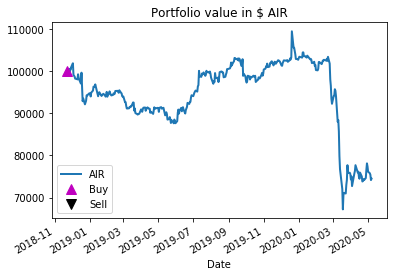

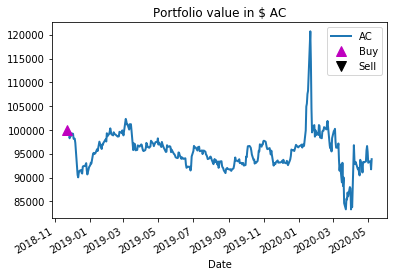

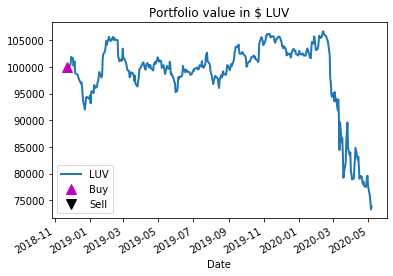

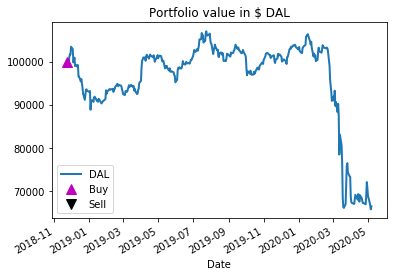

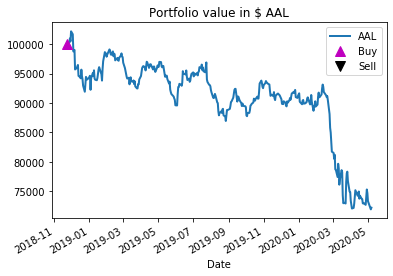

In [15]:
show_portfolio(portfolio_bh,signals_bh,predictdate)

### Show numbers on the strategy

In [16]:
#Total return
print("Returns : \n",(portfolio_bh['total'].tail(1)-initial_capital)/initial_capital)

# Isolate the returns of your strategy
returns_bh = portfolio_bh['returns']

#Volatility
print("\n Volatility : \n",returns_bh.std())

# annualized Sharpe ratio
sharpe_ratio_bh = np.sqrt(252) * (returns_bh.mean() / returns_bh.std())

# Print the Sharpe ratio
print("\nSharpe ratio:\n",sharpe_ratio_bh)

Returns : 
 Symbols         AIR        AC       LUV       DAL       AAL
Date                                                       
2020-05-07 -0.25513 -0.061509 -0.261688 -0.335876 -0.278061

 Volatility : 
 Symbols
AIR    0.003485
AC     0.009540
LUV    0.003307
DAL    0.004981
AAL    0.003139
dtype: float64

Sharpe ratio:
 Symbols
AIR   -0.244264
AC    -0.019519
LUV   -0.268992
DAL   -0.357813
AAL   -0.423048
dtype: float64


# Buy and Hold VS Moving average

### Compare the portfolio over time

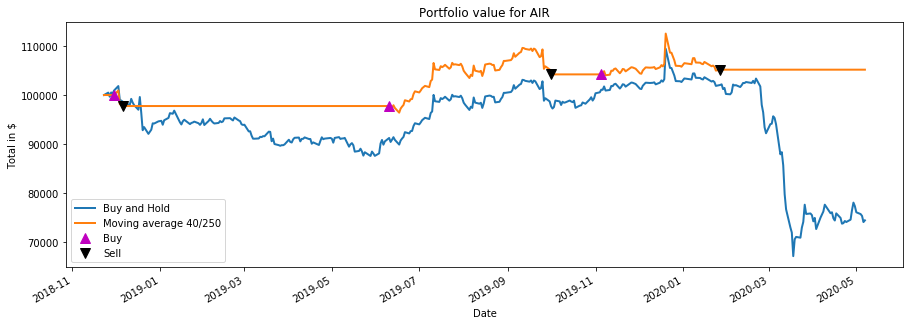

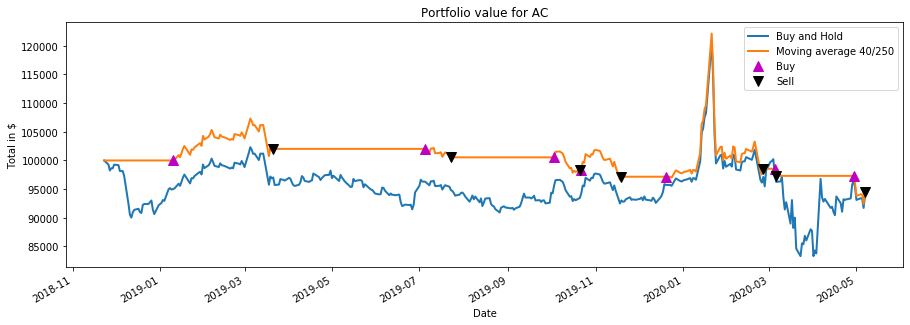

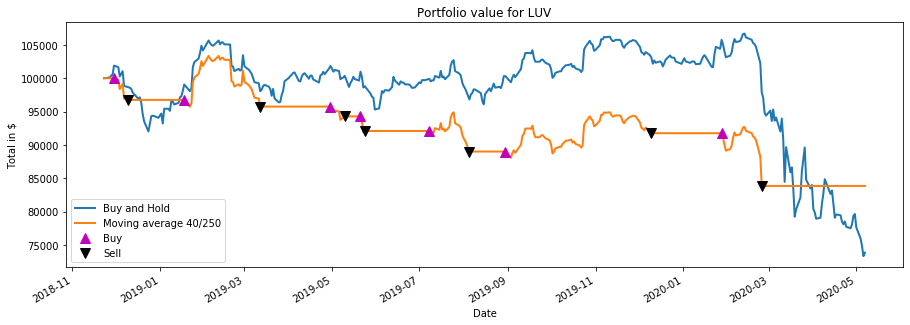

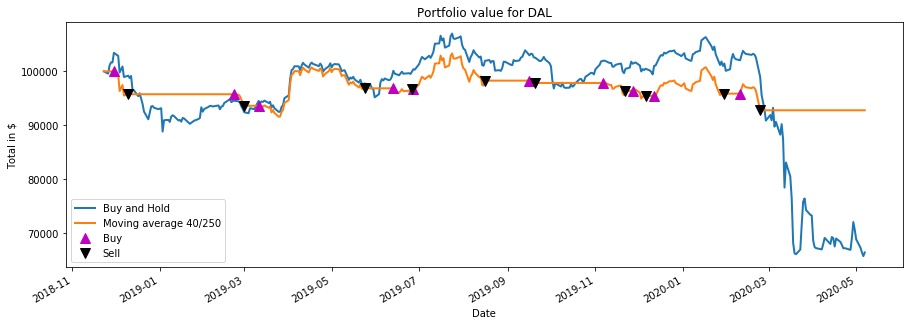

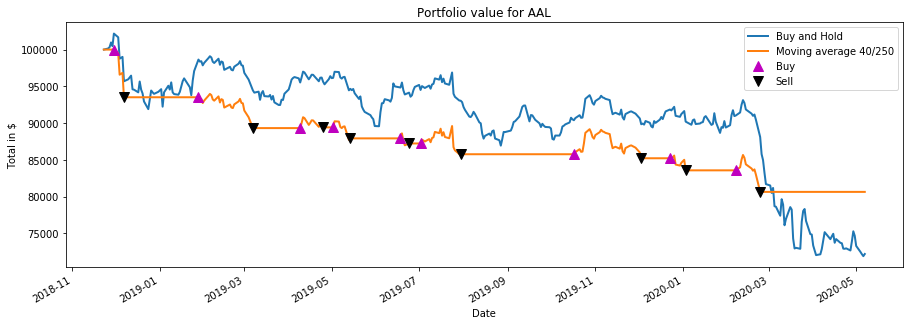

In [17]:
def compare_strategies(portfolio1,signals1,portfolio2,signals2,date,namestrat1="",namestrat2=""):
    #Compare the two
    for sign in SIGN:
        plt.figure(figsize=(15,5))

        # Plot the equity curve in dollars of Buy and hold
        portfolio1['total'][sign][portfolio1.index > date].plot(lw=2.,label=namestrat1)

        # Plot the equity curve in dollars
        portfolio2['total'][sign][portfolio2.index > date].plot(lw=2.,label=namestrat2)


        #Plot the buy signals
        plt.plot(portfolio2.loc[signals2.positions[sign] == 1.0].index, 
             portfolio2['total'][sign][signals2.positions[sign] == 1.0],
             '^', markersize=10, color='m',label="Buy")

        #plot the sell signals
        plt.plot(portfolio2.loc[signals2.positions[sign] == -1.0].index, 
             portfolio2['total',sign][signals2.positions[sign] == -1.0],
             'v', markersize=10, color='k',label="Sell")


        plt.legend()
        plt.ylabel("Total in $")
        plt.title("Portfolio value for "+sign)
        
compare_strategies(portfolio_bh,signals_bh,portfolio_ma,signals_ma,predictdate,"Buy and Hold","Moving average 40/250")

### Compare numbers

Return of Buy and Hold strategy : 
 Symbols         AIR        AC       LUV       DAL       AAL
Date                                                       
2020-05-07 -0.25513 -0.061509 -0.261688 -0.335876 -0.278061

Return of Custom strategy : 
 Symbols          AIR        AC       LUV       DAL       AAL
Date                                                        
2020-05-07  0.051623 -0.054481 -0.161585 -0.072214 -0.193564


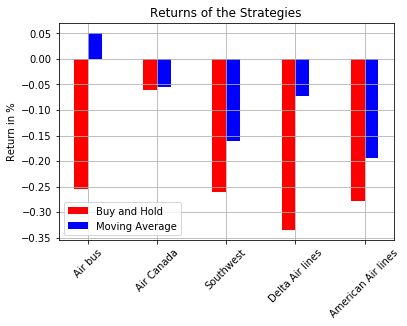

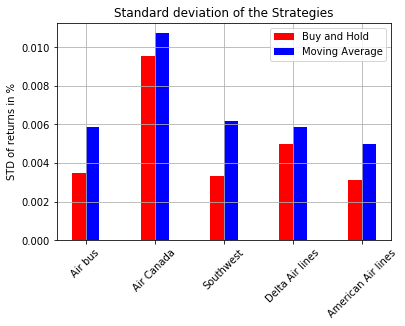

In [18]:
def compare(portfolio1,portfolio2,namestrat1="",namestrat2="",initial_capital=100000):

    returns1= (portfolio1['total'].tail(1)-initial_capital)/initial_capital
    returns2 = (portfolio2['total'].tail(1)-initial_capital)/initial_capital

    #Total return
    print("Return of Buy and Hold strategy : \n", (portfolio1['total'].tail(1)-initial_capital)/initial_capital)

    #Total return
    print("\nReturn of Custom strategy : \n",(portfolio2['total'].tail(1)-initial_capital)/initial_capital)  
    
    # Show the returns
    li_returns1 = []
    li_returns2 = []
    for sign in SIGN:
        li_returns1.append(returns1[sign].iloc[0])
        li_returns2.append(returns2[sign].iloc[0])

    barwidth = 0.2
    xs = range(len(li_returns1))
    x1 = [x-barwidth/2 for x in xs]
    x2 = [x + barwidth for x in x1]
    plt.bar(x1, li_returns1, width = barwidth, color = 'red',label=namestrat1)
    plt.bar(x2, li_returns2, width = barwidth, color = 'blue',label=namestrat2)
    plt.xticks(range(len(li_returns1)), NAMES,  rotation = 45)
    plt.title('Returns of the Strategies')
    plt.ylabel("Return in %")
    plt.legend()
    plt.grid()
    plt.show()
    
    returns1 = portfolio1['returns']
    returns2 = portfolio2['returns']
    
    std1 = returns1.std()
    std2 = returns2.std()
    
    # Show the returns
    li_std1 = []
    li_std2 = []
    for sign in SIGN:
        li_std1.append(std1[sign])
        li_std2.append(std2[sign])

        
    barwidth = 0.2
    xs = range(len(li_std1))
    x1 = [x-barwidth/2 for x in xs]
    x2 = [x + barwidth for x in x1]
    plt.bar(x1, li_std1, width = barwidth, color = 'red',label=namestrat1)
    plt.bar(x2, li_std2, width = barwidth, color = 'blue',label=namestrat2)
    plt.xticks(range(len(li_std1)), NAMES,  rotation = 45)
    plt.title('Standard deviation of the Strategies')
    plt.ylabel("STD of returns in %")
    plt.legend()
    plt.grid()
    plt.show()
    
compare(portfolio_bh,portfolio_ma,"Buy and Hold","Moving Average")

# Random Forest to predict stocks

In [20]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 19 16:05:16 2020

@authors: alanloret, alexandretaranoff, axelchedri, alexisaubert
"""

# import packages
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import datetime

# machine learning packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

# measure results
from sklearn.metrics import mean_squared_error

""" Useful functions """


class PossibleDataLeakages(Exception):
    """ This error class is raised when you input a date that may lead to data leakages :
        when you want to make predictions on the training data with a start date earlier
        than the end date of training dataset """
    pass


def my_data(start, end, share, days=0):
    """ Collecting our data from Yahoo website and returns a dataframe
        with the data from the start date to the end date.
        Note : here we collect our date futher than the input dates because due to moving average and rsi features
        if we don't do this NaN values will appear in our data. Moreover we have to be careful with the closing days."""

    data = web.DataReader(share, 'yahoo', datetime.datetime(*start) - datetime.timedelta(days=days),
                          datetime.datetime(*end)+datetime.timedelta(days=4)).rename(columns={'Adj Close': 'Adj_Close'})

    return data


def collect_data(start, end, *shares, **kwargs):
    """ Collecting our data and creating the features we want.
        Note :
        start -> tuple with (yyyy, mm, dd)
        shares -> strings made of shares name
        kwargs -> you can input * 'depths' for different depths for moving average and rsi features """

    stocks = {}
    depths = kwargs.get('depths', [14, 18, 30])

    for share in shares:
        df_share = my_data(start, end, share, 2*max(depths) + 1)
        df_share = df_share.sort_index()
        data = df_share.copy()

        # Crating our features
        data['1d_MinMax'] = data.High - data.Low
        data['1d_diff'] = data.Open - data.Close
        data['returns'] = data.Close.pct_change()
        data['change'] = data.Close.diff()
        data['gain'] = data.change.mask(data.change < 0, 0.0)
        data['loss'] = -data.change.mask(data.change > 0, -0.0)
        data['3d_pct'] = data.Close.pct_change(3)
        for depth in depths:
            data['ma' + str(depth)] = data.Close.rolling(depth).mean()
            data['rsi' + str(depth)] = 100 - 100/(1 + data.gain.rolling(depth).mean()/data.loss.rolling(depth).mean())

        # Target
        data['target'] = data['change'].shift(-1)

        # Drop all NaN values and select the useful data
        data.dropna(axis=0, inplace=True)
        data = data[datetime.datetime(*start) <= data.index]
        stocks[share] = data[datetime.datetime(*end) >= data.index].copy()

    return stocks


def linear_regression(start, end, *shares, **kwargs):
    """ Does a Linear Regression of the stocks and predicts the share's value for the date you've input
        Notes :
        start/end -> tuples with (yyyy, mm, dd)
        shares -> strings made of shares name
        kwargs -> you can input * 'features' for the training data,
                                * 'depths' for different depths for moving average and rsi features
                                * 'training_share' to select the share you want to train with """

    predictions = {}

    depths = kwargs.get('depths', [14, 18, 30])

    # Select the best features for the linear regression
    best_features = ['Low', 'Close', 'change', 'returns', 'gain', 'loss'] + ['rsi'+str(d) for d in depths] + ['target']
    features = kwargs.get('features', best_features)

    # Train-test split
    training_share = kwargs.get('training_share', TRAINSIGN)
    train = collect_data((2009, 1, 1), (2017, 10, 26), training_share, **kwargs)[training_share]
    train_data = train[features].copy()
    X_train, y_train = train_data.loc[:, train_data.columns != 'target'], train_data.target

    # Define the model
    model = LinearRegression()

    # Train the model using the training sets
    model.fit(X_train, y_train)

    for stock, df_stock in collect_data(start, end, *shares, **kwargs).items():
        if datetime.datetime(2017, 10, 26) > datetime.datetime(*start) and stock == training_share:
            raise PossibleDataLeakages('Your start date prediction is before the end date of the training data'
                                       'for the training share')

        df = df_stock[features].copy()
        X_test, y_test = df.loc[:, df.columns != 'target'], df.target

        # Make predictions
        y_pred_test = model.predict(X_test)
        y_pred_test = pd.Series(y_pred_test, index=y_test.index)

        predictions[stock] = pd.DataFrame(y_pred_test + df_stock.Close, columns=['target'])
        predictions[stock + '_mse'] = np.sqrt(mean_squared_error(y_pred_test, y_test))

    return predictions


def random_decision_tree(start, end, *shares, **kwargs):
    """ Creates a random tree regressor on the stocks to predict the share's value for the date you've input
        Notes :
        start/end -> tuples with (yyyy, mm, dd)
        shares -> strings made of shares name
        kwargs -> you can input * 'features' for the training data,
                                * 'depths' for different depths for moving average and rsi features
                                * 'training_share' to select the share you want to train with """

    predictions = {}

    depths = kwargs.get('depths', [14, 18, 30])

    # Select the best features for the random tree regressor
    best_features = ['ma' + str(d) for d in depths[1:]] + ['rsi' + str(d) for d in depths] +\
                    ['1d_MinMax', '1d_diff', 'gain', 'loss', 'returns', 'target']
    features = kwargs.get('features', best_features)

    #^FCHI
    # Train-test split
    training_share = kwargs.get('training_share', TRAINSIGN)
    train = collect_data((2009, 1, 1), (2017, 10, 26), training_share, **kwargs)[training_share]
    train_data = train[features].copy()
    X_train, y_train = train_data.loc[:, train_data.columns != 'target'], train_data.target

    # Define the model
    model = ExtraTreesRegressor(max_depth=9, random_state=0)

    # Train the model using the training sets
    model.fit(X_train, y_train)

    for stock, df_stock in collect_data(start, end, *shares, **kwargs).items():
        if datetime.datetime(2017, 10, 26) > datetime.datetime(*start) and stock == training_share:
            raise PossibleDataLeakages('Your start date prediction is before the end date of the training data '
                                       'for the training share')

        df = df_stock[features].copy()
        X_test, y_test = df.loc[:, df.columns != 'target'], df.target

        # Make predictions
        y_pred_test = model.predict(X_test)
        y_pred_test = pd.Series(y_pred_test, index=y_test.index)

        predictions[stock] = pd.DataFrame(y_pred_test + df_stock.Close, columns=['target'])
        predictions[stock + '_mse'] = np.sqrt(mean_squared_error(y_pred_test, y_test))

    return predictions


def moving_average(start, end, *shares, **kwargs):
    """ This function uses moving average to predict the share's value for the date you've input
        Notes :
        start/end -> tuples with (yyyy, mm, dd)
        shares -> strings made of shares name
        kwargs -> you can input * 'depths' number of days for the moving average """

    predictions = {}

    depths = kwargs.get('depths', [14, 18, 30])
    features = ['ma' + str(depth) for depth in depths]

    for stock, df_stock in collect_data(start, end, *shares, **kwargs).items():
        df = df_stock[features].copy()
        for feature in features:
            predictions[stock + '_' + feature] = pd.DataFrame(df[feature], index=df[feature].index)\
                                                   .rename(columns={feature: 'target'})

    return predictions

### Create strategy

In [21]:
#Load data
ticker = pdr.get_data_yahoo(SIGN, start=startdate, end=enddate)

#Create Data Frame
multiindex = [(a,b) for a in ['signal','Close','prediction','positions'] for b in SIGN]
signals_rf = pd.DataFrame(index=ticker.index,columns=pd.MultiIndex.from_tuples(multiindex,names=['Attributes', 'Symbols']))

signals_rf['signal'] = 0.0

pred = random_decision_tree((2018, 11, 22), (2020, 5, 7), *SIGN, )#depths=[1, 2])
#pred = linear_regression((2018, 11, 27), (2020, 1, 1), *SIGN, training_share=TRAINSIGN, depths=[13, 18, 30])

for sign in SIGN:
    signals_rf.loc[:,('prediction',sign)] = pred[sign]['target']
    signals_rf.loc[:,('Close',sign)] = ticker['Close'][sign]
    
# Create signals
short_window = 0
signals_rf.loc[short_window:,'signal'] = np.where(signals_rf['Close'][short_window:] 
                                            < signals_rf['prediction'][short_window:], 1.0, 0.0)   

signals_rf['positions'] = signals_rf['signal'].diff()

signals_rf.tail()

Attributes signal                          Close                        \
Symbols       AIR   AC  LUV  DAL  AAL        AIR         AC        LUV   
Date                                                                     
2020-05-01    1.0  0.0  1.0  1.0  1.0  18.330000  35.980000  29.230000   
2020-05-04    1.0  1.0  0.0  1.0  1.0  17.969999  36.279999  27.559999   
2020-05-05    1.0  0.0  0.0  1.0  1.0  17.590000  36.200001  26.420000   
2020-05-06    1.0  0.0  1.0  1.0  1.0  16.340000  34.590000  24.930000   
2020-05-07    1.0  0.0  0.0  1.0  1.0  16.690001  36.720001  25.450001   

Attributes                   prediction                                   \
Symbols           DAL    AAL        AIR         AC        LUV        DAL   
Date                                                                       
2020-05-01  24.120001  10.64  18.550507  35.935221  29.600005  24.228792   
2020-05-04  22.570000   9.82  18.006662  36.310214  27.390334  22.574718   
2020-05-05  21.709999   9.51  17.760235  36.096882  26.203826  21.793109   
2020-05-06  21.000000   9.25  16.586875  34.025916  24.934215  21.044242   
2020-05-07  21.680000   9.54  16.723973  36.117117  25.264141  21.687994   

Attributes            positions                      
Symbols           AAL       AIR   AC  LUV  DAL  AAL  
Date                                                 
2020-05-01  10.817691       0.0 -1.0  1.0  0.0  0.0  
2020-05-04  10.013569       0.0  1.0 -1.0  0.0  0.0  
2020-05-05   9.633030       0.0 -1.0  0.0  0.0  0.0  
2020-05-06   9.399718       0.0  0.0  1.0  0.0  0.0  
2020-05-07   9.720720       0.0  0.0 -1.0  0.0  0.0

### Backtest the strategy

In [22]:
portfolio_rf = backtest(ticker,signals_rf)
portfolio_rf.tail()

Attributes        action                                            \
Symbols              AIR            AC           LUV           DAL   
Date                                                                 
2020-05-01  18329.999924      0.000000  29229.999542  24120.000839   
2020-05-04  17969.999313  36279.998779      0.000000  22569.999695   
2020-05-05  17590.000153      0.000000      0.000000  21709.999084   
2020-05-06  16340.000153      0.000000  24930.000305  21000.000000   
2020-05-07  16690.000534      0.000000      0.000000  21680.000305   

Attributes                    holdings                              \
Symbols              AAL           AIR            AC           LUV   
Date                                                                 
2020-05-01  10640.000343  18329.999924      0.000000  29229.999542   
2020-05-04   9819.999695  17969.999313  36279.998779      0.000000   
2020-05-05   9510.000229  17590.000153      0.000000      0.000000   
2020-05-06   9250.000000  16340.000153      0.000000  24930.000305   
2020-05-07   9539.999962  16690.000534      0.000000      0.000000   

Attributes                              ...         total                 \
Symbols              DAL           AAL  ...           AIR             AC   
Date                                    ...                                
2020-05-01  24120.000839  10640.000343  ...  83197.072983  107348.899841   
2020-05-04  22569.999695   9819.999695  ...  82837.072372  107348.899841   
2020-05-05  21709.999084   9510.000229  ...  82457.073212  107268.901825   
2020-05-06  21000.000000   9250.000000  ...  81207.073212  107268.901825   
2020-05-07  21680.000305   9539.999962  ...  81557.073593  107268.901825   

Attributes                                             returns            \
Symbols              LUV           DAL           AAL       AIR        AC   
Date                                                                       
2020-05-01  90817.836761  86869.531631  92533.513069 -0.014802 -0.020887   
2020-05-04  89147.836685  85319.530487  91713.512421 -0.004327  0.000000   
2020-05-05  89147.836685  84459.529877  91403.512955 -0.004587 -0.000745   
2020-05-06  89147.836685  83749.530792  91143.512726 -0.015159  0.000000   
2020-05-07  89667.837143  84429.531097  91433.512688  0.004310  0.000000   

Attributes                                
Symbols          LUV       DAL       AAL  
Date                                      
2020-05-01  0.000000 -0.020190 -0.014589  
2020-05-04 -0.018388 -0.017843 -0.008862  
2020-05-05  0.000000 -0.010080 -0.003380  
2020-05-06  0.000000 -0.008406 -0.002845  
2020-05-07  0.005833  0.008119  0.003182  

[5 rows x 25 columns]

### Show the strategy

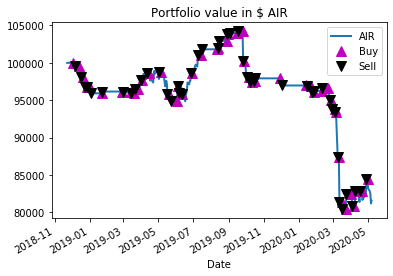

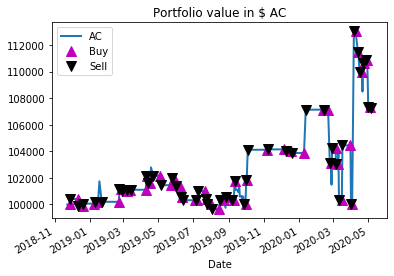

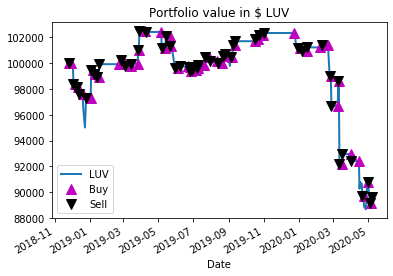

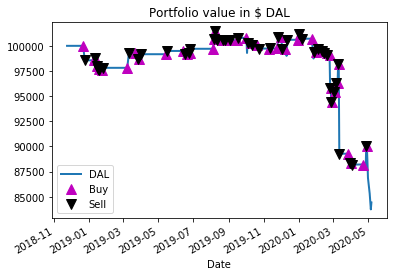

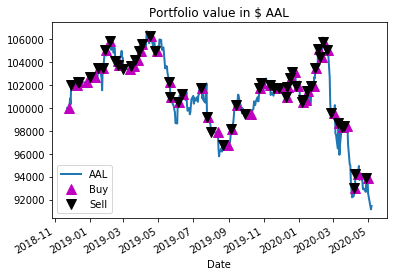

In [23]:
show_portfolio(portfolio_rf,signals_rf,predictdate)

### Get numbers

In [24]:
#Total return
print("Returns : \n",(portfolio_rf['total'].tail(1)-initial_capital)/initial_capital)

# Isolate the returns of your strategy
returns_rf = portfolio_rf['returns']

#Volatility
print("\n Volatility : \n",returns_rf.std())

# annualized Sharpe ratio
sharpe_ratio_rf = np.sqrt(252) * (returns_rf.mean() / returns_rf.std())

# Print the Sharpe ratio
print("\nSharpe ratio:\n",sharpe_ratio_rf)

Returns : 
 Symbols          AIR        AC       LUV       DAL       AAL
Date                                                        
2020-05-07 -0.184429  0.072689 -0.103322 -0.155705 -0.085665

 Volatility : 
 Symbols
AIR    0.001935
AC     0.005043
LUV    0.001442
DAL    0.002101
AAL    0.001922
dtype: float64

Sharpe ratio:
 Symbols
AIR   -0.323496
AC     0.233841
LUV   -0.231977
DAL   -0.373100
AAL   -0.185846
dtype: float64


# Buy and Hold VS Random Forest

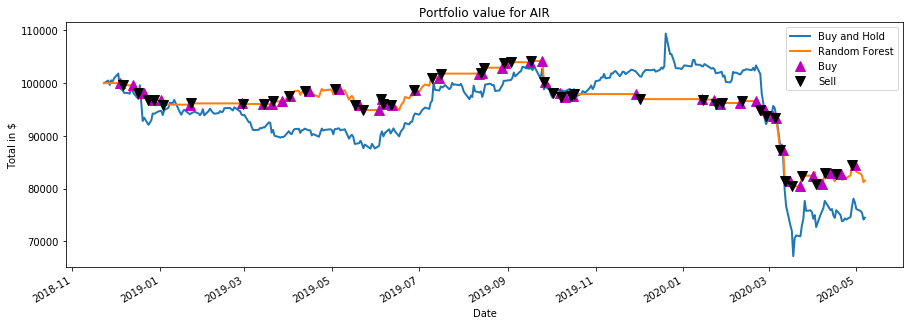

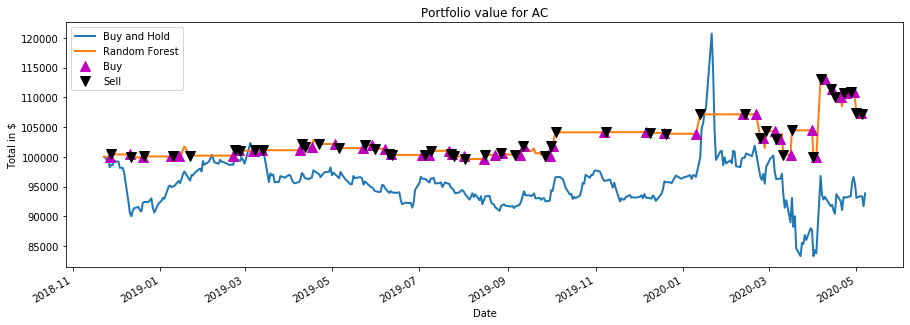

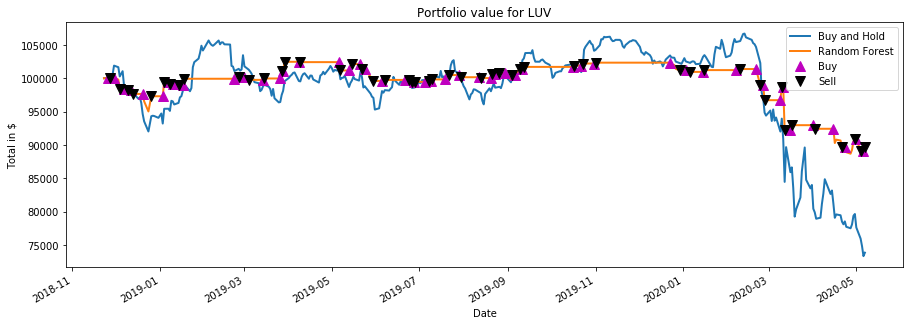

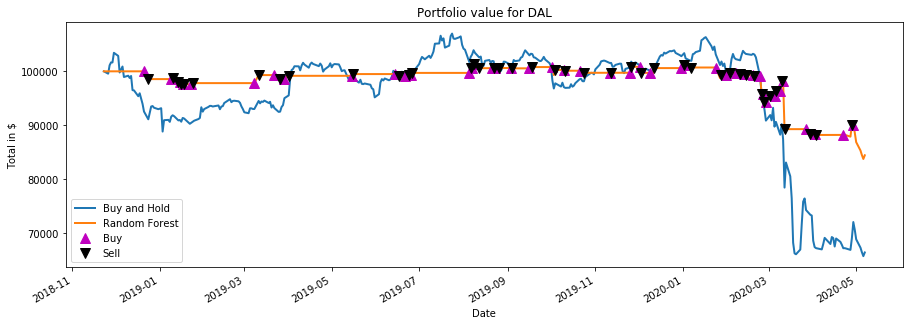

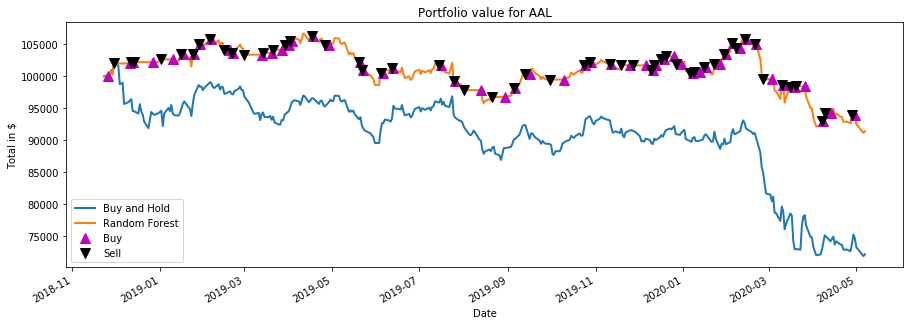

In [25]:
compare_strategies(portfolio_bh,signals_bh,portfolio_rf,signals_rf,predictdate,"Buy and Hold","Random Forest")

Return of Buy and Hold strategy : 
 Symbols         AIR        AC       LUV       DAL       AAL
Date                                                       
2020-05-07 -0.25513 -0.061509 -0.261688 -0.335876 -0.278061

Return of Custom strategy : 
 Symbols          AIR        AC       LUV       DAL       AAL
Date                                                        
2020-05-07 -0.184429  0.072689 -0.103322 -0.155705 -0.085665


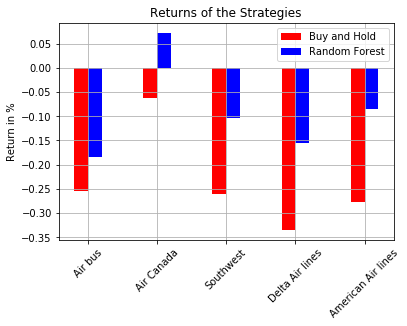

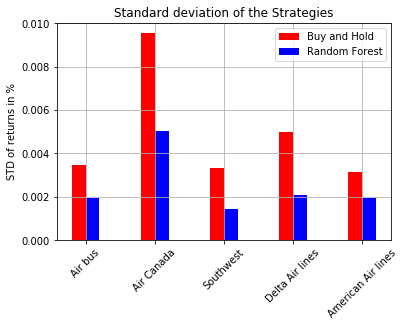

In [26]:
compare(portfolio_bh,portfolio_rf,"Buy and Hold","Random Forest")

In [27]:
# Show the sharpe ratio return

# Isolate the returns of your strategy
returns_bh = portfolio_bh['returns']
# annualized Sharpe ratio
sharpe_ratio_bh = np.sqrt(252) * (returns_bh.mean() / returns_bh.std())
# Print the Sharpe ratio
print("Sharpe ratio Buy and Hold: \n",sharpe_ratio_bh)

# Isolate the returns of your strategy
returns = portfolio_bh['returns']
# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())
# Print the Sharpe ratio
print("\nSharpe ratio Custom Strategy: \n",sharpe_ratio)


Sharpe ratio Buy and Hold: 
 Symbols
AIR   -0.244264
AC    -0.019519
LUV   -0.268992
DAL   -0.357813
AAL   -0.423048
dtype: float64

Sharpe ratio Custom Strategy: 
 Symbols
AIR   -0.244264
AC    -0.019519
LUV   -0.268992
DAL   -0.357813
AAL   -0.423048
dtype: float64


# Linear regression

In [28]:
#Load data
ticker = pdr.get_data_yahoo(SIGN, start=startdate, end=enddate)

#Create Data Frame
multiindex = [(a,b) for a in ['signal','Close','prediction','positions'] for b in SIGN]
signals_lr = pd.DataFrame(index=ticker.index,columns=pd.MultiIndex.from_tuples(multiindex,names=['Attributes', 'Symbols']))

signals_lr['signal'] = 0.0

pred = linear_regression((2018, 11, 27), (2020, 5, 7), *SIGN, training_share=TRAINSIGN, )#depths=[13, 18, 30])
#pred = linear_regression((2018, 11, 27), (2020, 1, 1), *SIGN, training_share=TRAINSIGN, depths=[13, 18, 30])

for sign in SIGN:
    signals_lr.loc[:,('prediction',sign)] = pred[sign]['target']
    signals_lr.loc[:,('Close',sign)] = ticker['Close'][sign]
    
# Create signals
short_window = 0
signals_lr.loc[short_window:,'signal'] = np.where(signals_lr['Close'][short_window:] 
                                            < signals_lr['prediction'][short_window:], 1.0, 0.0)   

signals_lr['positions'] = signals_lr['signal'].diff()

signals_lr.tail()

Attributes signal                          Close                        \
Symbols       AIR   AC  LUV  DAL  AAL        AIR         AC        LUV   
Date                                                                     
2020-05-01    1.0  1.0  1.0  1.0  1.0  18.330000  35.980000  29.230000   
2020-05-04    1.0  0.0  0.0  0.0  1.0  17.969999  36.279999  27.559999   
2020-05-05    1.0  0.0  0.0  1.0  1.0  17.590000  36.200001  26.420000   
2020-05-06    1.0  1.0  0.0  1.0  1.0  16.340000  34.590000  24.930000   
2020-05-07    1.0  0.0  0.0  0.0  1.0  16.690001  36.720001  25.450001   

Attributes                   prediction                                   \
Symbols           DAL    AAL        AIR         AC        LUV        DAL   
Date                                                                       
2020-05-01  24.120001  10.64  18.341327  35.989210  29.235436  24.158944   
2020-05-04  22.570000   9.82  17.970985  36.138115  27.519284  22.517316   
2020-05-05  21.709999   9.51  17.614766  36.176100  26.407733  21.732740   
2020-05-06  21.000000   9.25  16.370558  34.602297  24.927183  21.028660   
2020-05-07  21.680000   9.54  16.707393  36.511288  25.399843  21.671834   

Attributes            positions                      
Symbols           AAL       AIR   AC  LUV  DAL  AAL  
Date                                                 
2020-05-01  10.690209       0.0  0.0  1.0  0.0  0.0  
2020-05-04   9.832341       0.0 -1.0 -1.0 -1.0  0.0  
2020-05-05   9.548360       0.0  0.0  0.0  1.0  0.0  
2020-05-06   9.291887       0.0  1.0  0.0  0.0  0.0  
2020-05-07   9.593948       0.0 -1.0  0.0 -1.0  0.0

### Backtest

In [29]:
portfolio_lr = backtest(ticker,signals_lr)
portfolio_lr.tail()

Attributes        action                                            \
Symbols              AIR            AC           LUV           DAL   
Date                                                                 
2020-05-01  18329.999924  35979.999542  29229.999542  24120.000839   
2020-05-04  17969.999313      0.000000      0.000000      0.000000   
2020-05-05  17590.000153      0.000000      0.000000  21709.999084   
2020-05-06  16340.000153  34590.000153      0.000000  21000.000000   
2020-05-07  16690.000534      0.000000      0.000000      0.000000   

Attributes                    holdings                              \
Symbols              AAL           AIR            AC           LUV   
Date                                                                 
2020-05-01  10640.000343  18329.999924  35979.999542  29229.999542   
2020-05-04   9819.999695  17969.999313      0.000000      0.000000   
2020-05-05   9510.000229  17590.000153      0.000000      0.000000   
2020-05-06   9250.000000  16340.000153  34590.000153      0.000000   
2020-05-07   9539.999962  16690.000534      0.000000      0.000000   

Attributes                              ...         total                \
Symbols              DAL           AAL  ...           AIR            AC   
Date                                    ...                               
2020-05-01  24120.000839  10640.000343  ...  91750.818253  94399.394989   
2020-05-04      0.000000   9819.999695  ...  91390.817642  94699.394226   
2020-05-05  21709.999084   9510.000229  ...  91010.818481  94699.394226   
2020-05-06  21000.000000   9250.000000  ...  89760.818481  94699.394226   
2020-05-07      0.000000   9539.999962  ...  90110.818863  96829.395294   

Attributes                                              returns            \
Symbols               LUV           DAL           AAL       AIR        AC   
Date                                                                        
2020-05-01  103434.576035  91703.248978  93187.457085 -0.013441 -0.023684   
2020-05-04  101764.575958  90153.247833  92367.456436 -0.003924  0.003178   
2020-05-05  101764.575958  90153.247833  92057.456970 -0.004158  0.000000   
2020-05-06  101764.575958  89443.248749  91797.456741 -0.013735  0.000000   
2020-05-07  101764.575958  90123.249054  92087.456703  0.003899  0.022492   

Attributes                                
Symbols          LUV       DAL       AAL  
Date                                      
2020-05-01  0.000000 -0.019146 -0.014489  
2020-05-04 -0.016145 -0.016902 -0.008799  
2020-05-05  0.000000  0.000000 -0.003356  
2020-05-06  0.000000 -0.007875 -0.002824  
2020-05-07  0.000000  0.007603  0.003159  

[5 rows x 25 columns]

### Show the porfolio

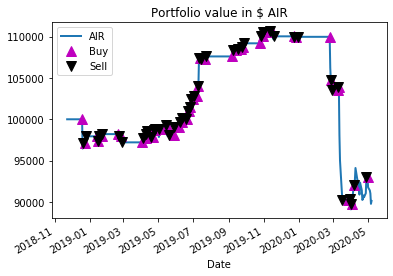

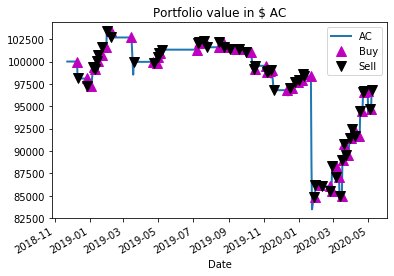

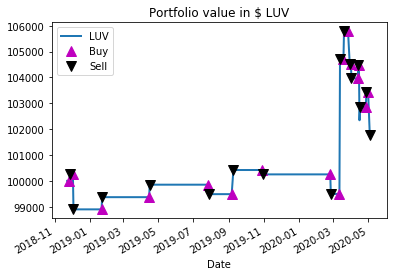

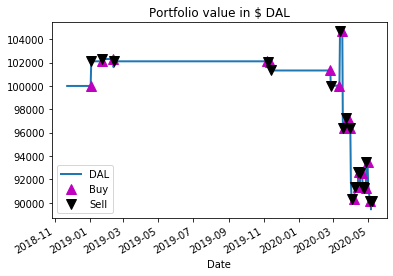

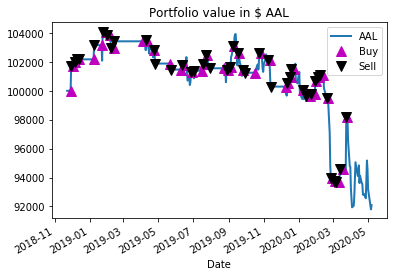

In [30]:
show_portfolio(portfolio_lr,signals_lr,predictdate)

### Get numbers

In [31]:
#Total return
print("Returns : \n",(portfolio_rf['total'].tail(1)-initial_capital)/initial_capital)

# Isolate the returns of your strategy
returns_rf = portfolio_rf['returns']

#Volatility
print("\n Volatility : \n",returns_rf.std())

# annualized Sharpe ratio
sharpe_ratio_rf = np.sqrt(252) * (returns_rf.mean() / returns_rf.std())

# Print the Sharpe ratio
print("\nSharpe ratio:\n",sharpe_ratio_rf)

Returns : 
 Symbols          AIR        AC       LUV       DAL       AAL
Date                                                        
2020-05-07 -0.184429  0.072689 -0.103322 -0.155705 -0.085665

 Volatility : 
 Symbols
AIR    0.001935
AC     0.005043
LUV    0.001442
DAL    0.002101
AAL    0.001922
dtype: float64

Sharpe ratio:
 Symbols
AIR   -0.323496
AC     0.233841
LUV   -0.231977
DAL   -0.373100
AAL   -0.185846
dtype: float64


# Buy and Hold VS Linear Regression

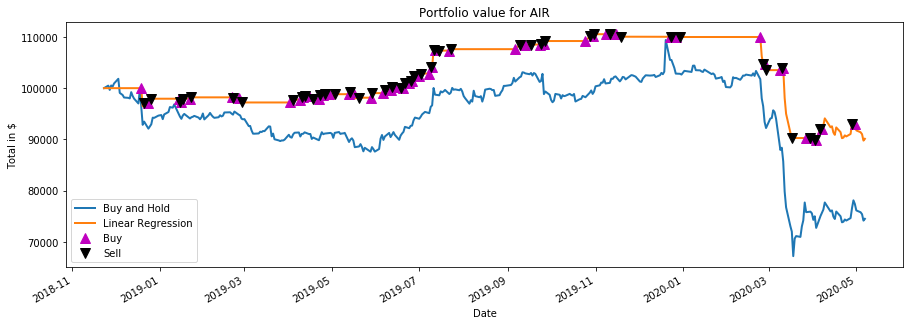

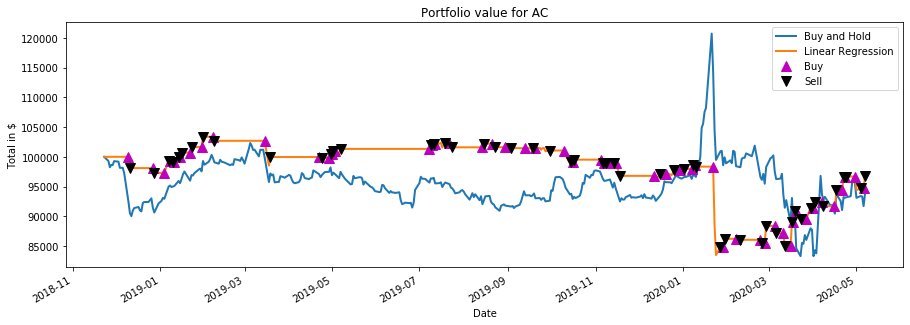

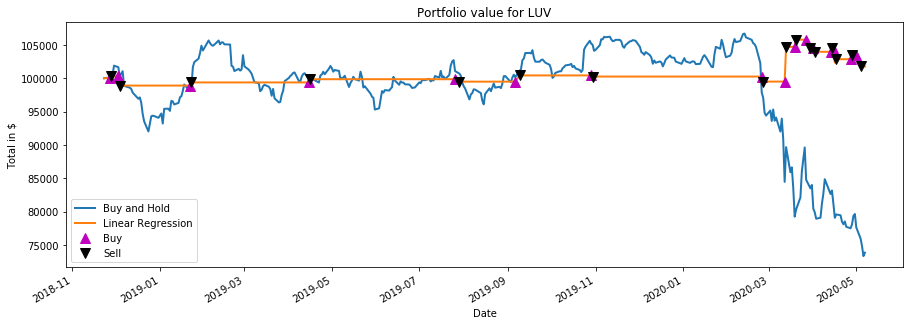

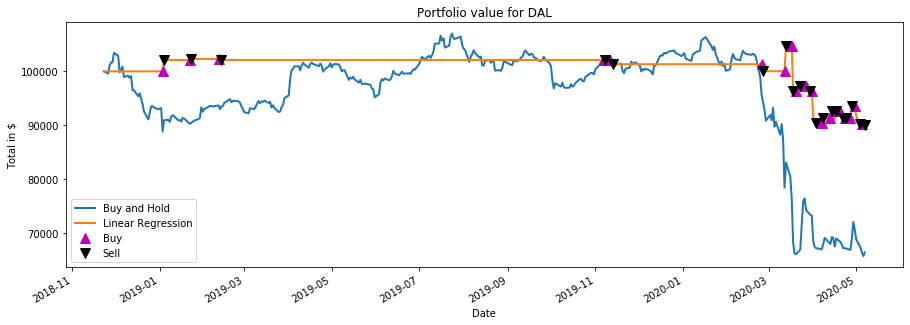

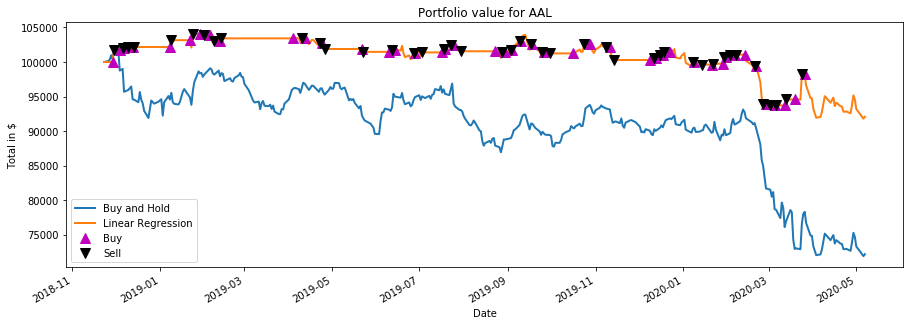

In [32]:
compare_strategies(portfolio_bh,signals_bh,portfolio_lr,signals_lr,predictdate,"Buy and Hold","Linear Regression")

Return of Buy and Hold strategy : 
 Symbols         AIR        AC       LUV       DAL       AAL
Date                                                       
2020-05-07 -0.25513 -0.061509 -0.261688 -0.335876 -0.278061

Return of Custom strategy : 
 Symbols          AIR        AC       LUV       DAL       AAL
Date                                                        
2020-05-07 -0.098892 -0.031706  0.017646 -0.098768 -0.079125


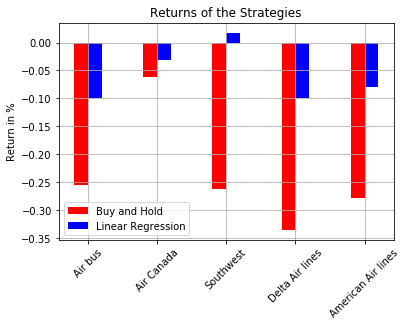

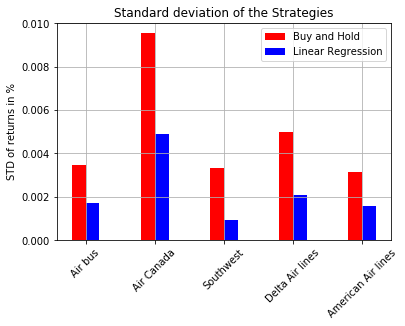

In [34]:
compare(portfolio_bh,portfolio_lr,"Buy and Hold","Linear Regression")

# Ideas

- do the process on all the CAC40 indices
- optimize the sma on a period and test on another
- other strategies : predict courses
- adpat to a library : quantopiant
- compare group of actions
- stats on single results
- sum up
